# Z-Test

Your sample size is greater than 30. Otherwise, use a t test. 
Data points should be independent from each other. In other words, one data point isn’t related or doesn’t affect another data point.
Your data should be normally distributed. However, for large sample sizes (over 30) this doesn’t always matter.
Your data should be randomly selected from a population, where each item has an equal chance of being selected.
Sample sizes should be equal if at all possible.

In [16]:
import pandas as pd
import numpy as  np
from random import random

In [12]:
from scipy import stats

In [14]:
from statsmodels.stats import weightstats as stests

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

If you where to collect the blood pressure for an individual before and after some treatment, condition, or time point.

H0:- means difference between two sample is 0

H1:- mean difference between two sample is not 0

In [22]:
df = pd.read_csv("blood_pressure.csv")
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [23]:

df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


# simple ztest

In [24]:
# try for bp before, python mean was 156.45, lets test it

In [25]:
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

0.6651614730255063
fail to reject null hypothesis


H0 : mean of two group is 0

H1 : mean of two group is not 0

In [26]:
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.002162306611369422
accept null hypothesis


# ANOVA (F-TEST) 


The t-test works well when dealing with two groups, 
but sometimes we want to compare more than two groups at the same time. 

For example, if we wanted to test whether voter age differs based on some categorical variable like race, we have to compare the means of each level or group the variable.

We could carry out a separate t-test for each pair of groups, but when you conduct many tests you increase the chances of false positives. 

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

# F = Between group variability / Within group variability

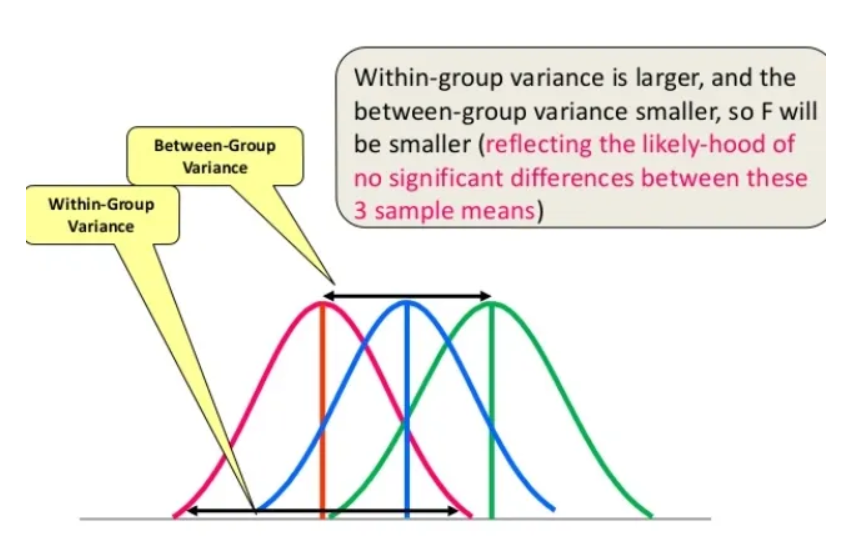

## One Way F-test(Anova) :- It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of plant and their weight.

Need to check whether all 3 group are similar or not (code in python below)

In [28]:
df_anova = pd.read_csv("PlantGrowth.csv")

In [29]:
df_anova.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [42]:
df_anova['group'].value_counts()

ctrl    10
trt1    10
trt2    10
Name: group, dtype: int64

In [43]:
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}

In [44]:
grps

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [45]:
d_data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64,
 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64,
 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [51]:
f,p = stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
if p<=0.05:
    print("reject NUll hypothesis")
else:
    print("fail to reject null hypothesis")

reject NUll hypothesis


# 2 way F test

Two way F-test is extension of 1-way f-test, it is used when we have 2 independent variable and 2+ groups. 2-way F-test does not tell which variable is dominant. if we need to check individual significance then Post-hoc testing need to be performed.

Now let’s take a look at the Grand mean crop yield (the mean crop yield not by any sub-group), as well the mean crop yield by each factor, as well as by the factors grouped together

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [54]:
df_anova2

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0
5,B,High,34.8
6,B,High,27.0
7,B,High,30.2
8,B,High,30.8
9,B,High,26.4
